##UNET 구현

아래 모델 아키텍쳐를 참고하여 Input으로 **512 * 512 크기의 1차원 이미지가 전달**
되었을 때를 가정하여 Unet을 구현해주세요

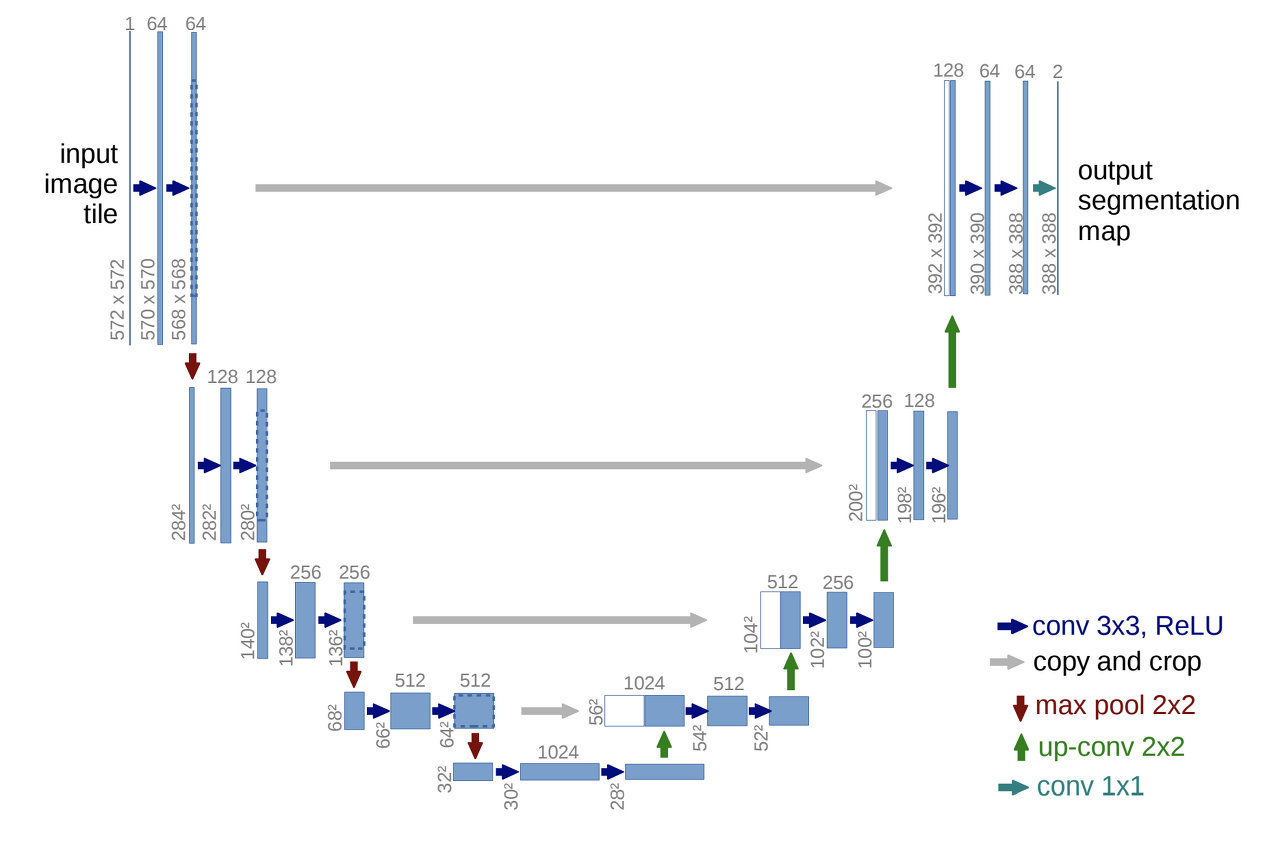

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torchsummary import summary as summary_

In [ ]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        ############## Add Layer ##############
        def CBR2d(in_channels, out_channels, kernel_size = 3 , stride =1, padding=1,bias =True)
            layers = []
            layers += [nn.Conv2D(in_channels = in_channels, out_channels= out_channels,
                                 kernel_size=kernel_size, stride= stride, padding=padding,
                                 bias=bias)]
            layers += [nn.BatchNorm2d(num_features= out_channels)]
            layers += [nn.RELU()]

            cbr = nn.Sequential(*layers)

            return cbr


        self.enc_1 = CBR2d(in_channels = 1, out_channels = 64, kernel_size=3, stride=1,padding=1,bias=True)
        self.enc_1_1 = CBR2d(in_channels = 64, out_channels = 64, kernel_size=3, stride=1,padding=1,bias=True)

        self.max_pool1 = nn.MaxPool2d(kernel_size=2)

        self.enc_2 = CBR2d(in_channels = 64, out_channels = 128, kernel_size=3, stride=1,padding=1,bias=True)
        self.enc_2_1 = CBR2d(in_channels = 128, out_channels = 128, kernel_size=3, stride=1,padding=1,bias=True)

        self.max_pool2 = nn.MaxPool2d(kernel_size=2)

        self.enc_3 = CBR2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1, bias=True)
        self.enc_3_1 CBR2d(in_channels=256, out_channels =256, kernel_size =3, stride=1, padding =1, bias =True)

        self.max_pool3 = nn.MaxPool2d(kernel_size=2)

        self.enc_4 = CBR2d(in_channels=256, out_channels =512, kernel_size =3, stride=1, padding =1, bias =True)
        self.enc_4_1 = CBR2d(in_channels=512, out_channels =512, kernel_size =3, stride=1, padding =1, bias =True)

        self.max_pool4 = nn.MaxPool2d(kernel_size=2)

        self.enc_5 = CBR2d(in_channels=512,out_channels=1024, kernel_size=3, stride=1,padding=1,bias=True)


        #### decoder

        self.dec_5 = CBR2d(in_channels= 1024, out_channels=512, kernel_size=3,stride=1,padding=1,bias=True)


        self.unpool4 = nn.ConvTranspose2d(in_channels =512, out_channels = 512, kernel_size = 2, stride = 2, padding = 0, bias = True)


        # copy and crop으로 512 + 512를 통해 512를 내보내게 함
        self.dec4_2 = CBR2d(in_channels=1024, out_channels =512, kernel_size =3, stride=1, padding =1, bias =True)
        self.dec4_1 = CBR2d(in_channels=512, out_channels =256, kernel_size =3, stride=1, padding =1, bias =True)


        self.unpool3 = nn.ConvTranspose2d(in_channels=256, out_channels=256,kernel_size=2, stride=2, padding=0, bias=True)


        self.dec3_2 = CBR2d(in_channels=512, out_channels=256)
        self.dec3_1 = CBR2d(in_channels=256, out_channels=128)


        self.unpool2 = nn.ConvTranspose2d(in_channels=128, out_channels=128,
                                          kernel_size=2, stride=2, padding=0, bias=True)


        self.dec2_2 = CBR2d(in_channels=256, out_channels=128)
        self.dec2_1 = CBR2d(in_channels=128, out_channels=64)


        self.unpool1 = nn.ConvTranspose2d(in_channels=64, out_channels=64,
                                          kernel_size=2, stride=2, padding=0, bias=True)


        self.dec1_2 = CBR2d(in_channels=128, out_channels=64)
        self.dec1_1 = CBR2d(in_channels=64, out_channels=64)


        self.fc = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True)

    def forward(self, x):

         ############## Add Layer ##############

        enc1 = self.enc1(x)
        enc1_1 = self.enc_1_1(enc1)

        poo1 = self.max_pool1(enc1_1)

        enc2 = self.enc2(pool1)
        enc2_1 = self.enc2_1(enc2)

        pool2 = self.max_pool2(enc2_1)

        enc3 = self.enc3(pool2)
        enc3_1 = self.enc3_1(enc3)
        pool3 = self.max_poo3(enc3_1)

        enc4 = self.enc4(pool3)
        enc4_1 = self.enc4_1(enc4)

        pool4 = self.max_pool4(enc4_1)

        enc5 = self.enc_5(pool4)

        dec5 = self.dec_5(enc5)

        unpool4 = self.unpool4(dec5)

        ## copy and crop
        cat4 = torch.cat((unpool4,enc4_1),dim=1)

        dec4_2 = self.dec4_2(cat4)
        dec4_1 = self.dec4_1(dec4_2)

        unpool3 = self.unpool3(dec4_1)

        cat3 = torch.cat((unpool3, enc3_2),dim =1)

        dec3_2 = self.dec3_2(cat3)
        dec3_1 = self.dec3_1(dec3_2)

        unpool2 = self.unpool2(dec3_1)

        cat2 = torch.cat((unpool2, enc2_2),dim =1)

        dec2_2 = self.dec2_2(cat2)
        dec2_1 = self.dec2_1(dec2_2)

        # 반복 1층
        unpool1 = self.unpool1(dec2_1)

        cat1 = torch.cat((unpool1, enc1_2),dim =1)

        dec1_2 = self.dec1_2(cat1)
        dec1_1 = self.dec1_1(dec1_2)

        x = self.fc(dec1_1)

        return x


In [ ]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Convolution + BatchNormalization + Relu 정의하기
        def CBR2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
            layers = []
            layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                 kernel_size=kernel_size, stride=stride, padding=padding,
                                 bias=bias)]
            layers += [nn.BatchNorm2d(num_features=out_channels)]
            layers += [nn.ReLU()]

            cbr = nn.Sequential(*layers)

            return cbr

        # 수축 경로(Contracting path)
        self.enc1_1 = CBR2d(in_channels=1, out_channels=64)
        self.enc1_2 = CBR2d(in_channels=64, out_channels=64)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.enc2_1 = CBR2d(in_channels=64, out_channels=128)
        self.enc2_2 = CBR2d(in_channels=128, out_channels=128)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.enc3_1 = CBR2d(in_channels=128, out_channels=256)
        self.enc3_2 = CBR2d(in_channels=256, out_channels=256)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.enc4_1 = CBR2d(in_channels=256, out_channels=512)
        self.enc4_2 = CBR2d(in_channels=512, out_channels=512)

        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.enc5_1 = CBR2d(in_channels=512, out_channels=1024)

        # 확장 경로(Expansive path)
        self.dec5_1 = CBR2d(in_channels=1024, out_channels=512)

        self.unpool4 = nn.ConvTranspose2d(in_channels=512, out_channels=512,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec4_2 = CBR2d(in_channels=2 * 512, out_channels=512)
        self.dec4_1 = CBR2d(in_channels=512, out_channels=256)

        self.unpool3 = nn.ConvTranspose2d(in_channels=256, out_channels=256,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec3_2 = CBR2d(in_channels=2 * 256, out_channels=256)
        self.dec3_1 = CBR2d(in_channels=256, out_channels=128)

        self.unpool2 = nn.ConvTranspose2d(in_channels=128, out_channels=128,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec2_2 = CBR2d(in_channels=2 * 128, out_channels=128)
        self.dec2_1 = CBR2d(in_channels=128, out_channels=64)

        self.unpool1 = nn.ConvTranspose2d(in_channels=64, out_channels=64,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec1_2 = CBR2d(in_channels=2 * 64, out_channels=64)
        self.dec1_1 = CBR2d(in_channels=64, out_channels=64)

        self.fc = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True)

    # forward 함수 정의하기
    def forward(self, x):
        enc1_1 = self.enc1_1(x)
        enc1_2 = self.enc1_2(enc1_1)
        pool1 = self.pool1(enc1_2)

        enc2_1 = self.enc2_1(pool1)
        enc2_2 = self.enc2_2(enc2_1)
        pool2 = self.pool2(enc2_2)

        enc3_1 = self.enc3_1(pool2)
        enc3_2 = self.enc3_2(enc3_1)
        pool3 = self.pool3(enc3_2)

        enc4_1 = self.enc4_1(pool3)
        enc4_2 = self.enc4_2(enc4_1)
        pool4 = self.pool4(enc4_2)

        enc5_1 = self.enc5_1(pool4)

        dec5_1 = self.dec5_1(enc5_1)

        unpool4 = self.unpool4(dec5_1)
        cat4 = torch.cat((unpool4, enc4_2), dim=1)
        dec4_2 = self.dec4_2(cat4)
        dec4_1 = self.dec4_1(dec4_2)

        unpool3 = self.unpool3(dec4_1)
        cat3 = torch.cat((unpool3, enc3_2), dim=1)
        dec3_2 = self.dec3_2(cat3)
        dec3_1 = self.dec3_1(dec3_2)

        unpool2 = self.unpool2(dec3_1)
        cat2 = torch.cat((unpool2, enc2_2), dim=1)
        dec2_2 = self.dec2_2(cat2)
        dec2_1 = self.dec2_1(dec2_2)

        unpool1 = self.unpool1(dec2_1)
        cat1 = torch.cat((unpool1, enc1_2), dim=1)
        dec1_2 = self.dec1_2(cat1)
        dec1_1 = self.dec1_1(dec1_2)

        x = self.fc(dec1_1)

        return x

In [ ]:
# model summary

model = UNet()
summary_(model, (1,512,512))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 512, 512]             640
       BatchNorm2d-2         [-1, 64, 512, 512]             128
              ReLU-3         [-1, 64, 512, 512]               0
            Conv2d-4         [-1, 64, 512, 512]          36,928
       BatchNorm2d-5         [-1, 64, 512, 512]             128
              ReLU-6         [-1, 64, 512, 512]               0
         MaxPool2d-7         [-1, 64, 256, 256]               0
            Conv2d-8        [-1, 128, 256, 256]          73,856
       BatchNorm2d-9        [-1, 128, 256, 256]             256
             ReLU-10        [-1, 128, 256, 256]               0
           Conv2d-11        [-1, 128, 256, 256]         147,584
      BatchNorm2d-12        [-1, 128, 256, 256]             256
             ReLU-13        [-1, 128, 256, 256]               0
        MaxPool2d-14        [-1, 128, 1

Skip connection이 무엇이며 어떤 효과가 있는 지 설명해주세요.


답변 :
Skip connection은 UNet에서 중요한 요소 중 하나로, 네트워크의 깊이에도 불구하고 정보가 손실되지 않도록 도와주는 구조다.  Skip connection은 인코더와 디코더를 연결하는데 사용된다. 인코더에서 추출된 특징은 디코더에게 전달되지만, 이 과정에서 정보가 손실될 수 있기 때문에 정보 손실을 보완한다.

또한 skip connection은 그래디언트의 흐름을 도와주어 학습을 안정화시키고, 긴 경로를 따라 정보가 손실되는 것을 방지하여 적은 데이터로도 효율적인 학습을 가능하게 한다.